## Read into Python

Let's first read the required data from CSV file using Pandas library.

In [1]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np                  #linear algebra
import pandas as pd                 # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt     #For Visualisation
import seaborn as sns               #For better Visualisation
from bs4 import BeautifulSoup       #For Text Parsing

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('gold_3.csv')
data = data[['Dates','News','PriceSentiment']]
print(data.shape)
data.head(7)


(2500, 3)


,Dates,News,PriceSentiment
0,10/10/11,can make money on gold at these levels also: k...,none
1,13/6/17,Gold prices hold modest loss after PPI report,negative
2,12/12/16,gold jewellery sales pick up slowly after fall...,positive
3,22/9/16,Gold climbs to 2-week high on cautious Fed out...,positive
4,30/11/05,spot gold quoted at $492.30 in asia trade,positive
5,1/10/15,mcx gold december contract trades lower,negative
6,1/8/12,how top performers are going for the gold,none


Now, show the data how looks like…

In [3]:
data.isnull().sum()

Dates             0
News              0
PriceSentiment    0
dtype: int64

In [4]:
data=data.dropna()
data.isnull().sum()

Dates             0
News              0
PriceSentiment    0
dtype: int64

['none' 'negative' 'positive' 'neutral']


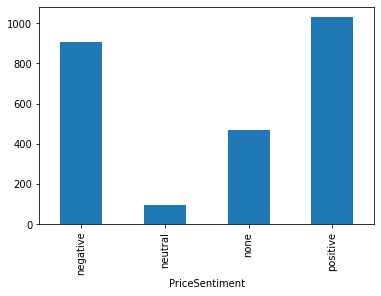

In [5]:
Sentiment = data['PriceSentiment'].unique()
print(Sentiment)

data.groupby(data['PriceSentiment']).News.count().plot.bar(ylim=0)
plt.show()


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/whatbest/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()
words = stopwords.words("english")

data['processedtext'] = data['News'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())


In [8]:
print(data.shape)
data.head(10)

(2500, 4)


,Dates,News,PriceSentiment,processedtext
0,10/10/11,can make money on gold at these levels also: k...,none,make money gold level also kishor narn anand r...
1,13/6/17,Gold prices hold modest loss after PPI report,negative,gold price hold modest loss ppi report
2,12/12/16,gold jewellery sales pick up slowly after fall...,positive,gold jewelleri sale pick slowli fall
3,22/9/16,Gold climbs to 2-week high on cautious Fed out...,positive,gold climb week high cautiou fed outlook
4,30/11/05,spot gold quoted at $492.30 in asia trade,positive,spot gold quot asia trade
5,1/10/15,mcx gold december contract trades lower,negative,mcx gold decemb contract trade lower
6,1/8/12,how top performers are going for the gold,none,top perform go gold
7,25/7/14,gold remains higher after durable-goods data,positive,gold remain higher durabl good data
8,27/7/17,Gold prices log highest finish since the middl...,positive,gold price log highest finish sinc middl june
9,12/10/16,Gold futures waver in electronic trading after...,none,gold futur waver electron trade fed minut


## Pre-process Data

We need to remove package name as it's not relevant. Then convert text to lowercase for CSV data. So, this is data pre-process stage.

In [9]:
def preprocess_data(data):
    # Remove package name as it's not relevant
    #data = data.drop('News', axis=1)
    
    # Convert text to lowercase
    data['processedtext'] = data['processedtext'].str.strip().str.lower()
    return data

In [10]:
data = preprocess_data(data)

## Splitting Data

First, separate the columns into dependent and independent variables (or features and label). Then you split those variables into train and test set.

In [11]:
df = data
# Split into training and testing data
x = data['processedtext']
y = data['PriceSentiment']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)


Vectorize text reviews to numbers.

In [12]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

## Model Generation

After splitting and vectorize text reviews to number, we will generate a random forest model on the training set and perform prediction on test set features.

In [13]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

## Evaluating Model

After model generation, check the accuracy using actual and predicted values.

In [14]:
model.score(x_test, y_test)*100


75.36

Then check prediction…

In [15]:
from itertools import count
import pandas as pd
df = pd.read_csv('gold-dataset-sinha-khandait.csv', sep=',', header=None)
start = 7500
end = 10000
df = df[start - 1:end - 1]
correct = 0
for i in range(len(df)):
    print(df.values[i][2])
    print(model.predict(vec.transform([df.values[i][2]])),df.values[i][9] == model.predict(vec.transform([df.values[i][2]])))
    
    if df.values[i][9] == model.predict(vec.transform([df.values[i][2]])):
        correct += 1
        
print(correct / len(df) * 100 )        

Gold futures decline to Rs 28,509 per 10 gm
['negative'] [ True]
June gold gains $3.50, or 0.3%, to settle at $1,227.70/oz
['positive'] [ True]
why it makes sense to buy gold
['positive'] [False]
gold futures hit fresh high in electronic trading
['positive'] [ True]
gold imports plunges to $650 million in august
['negative'] [False]
gold strengthens as demand picks up
['positive'] [ True]
gold, silver rise on global cues
['positive'] [ True]
Gold futures steady near 1-week highs
['positive'] [False]
gold prices extend weakness
['positive'] [False]
Gold futures a tad up at Rs 27,030 per 10 gm
['positive'] [ True]
gold, oil hold to losses after sentiment data
['negative'] [ True]
Gold to edge lower on dwindling demand, central bank purchases
['negative'] [ True]
gold prices move higher after u.s. data disappoints
['positive'] [ True]
august gold rises $2.30 to $1,232.50/oz on globex
['negative'] [False]
Gold futures notch fifth straight session gain
['positive'] [ True]
Gold prices turn 

In [16]:
#model.predict(vec.transform(['december gold down $1 at $749 an ounce on nymex']))

In [17]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']